In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
# df=pd.read_csv("Wine.csv")
# read file
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# #separate features and lables
# x=df.iloc[:,0:13]
# y=df.iloc[:,13]

# separate labels and features
x=df.iloc[:,2:4].values
y=df.iloc[:,4].values

In [4]:
# Splitting the X and Y into the 
# Training set and Testing set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [6]:
# Feature Scaling
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_cv = sc.transform(x_cv)

In [7]:
from sklearn.decomposition import KernelPCA
# applying pca 
kpca = KernelPCA(n_components=2,kernel='rbf')  
x_train = kpca.fit_transform(x_train)  
x_cv = kpca.transform(x_cv)

In [8]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = classifier.predict(x_train) 
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [10]:
y_cv_pred=classifier.predict(x_cv)
y_cv_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [11]:
# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_train, y_pred) 
cm

array([[145,  16],
       [ 14,  81]])

In [12]:
cm = confusion_matrix(y_cv, y_cv_pred) 
cm

array([[34,  4],
       [ 5, 21]])

In [13]:
#  calculating accuracy
from sklearn.metrics import accuracy_score
acc=(accuracy_score(y_train, y_pred)*100)  
print('Accuracy is' , acc)

Accuracy is 88.28125


In [14]:
# calculating accuracy
from sklearn.metrics import accuracy_score
acc=(accuracy_score(y_cv, y_cv_pred)*100)  
print('Accuracy is' , acc)

Accuracy is 85.9375


In [15]:
# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt
  
X_set, y_set = x_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('red', 'green', 'blue'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 640x480 with 1 Axes>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


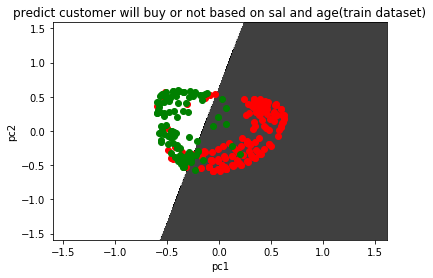

In [16]:
#  visualization on training set
x,y=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('black','white')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y)):
    plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)

plt.title('predict customer will buy or not based on sal and age(train dataset)')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


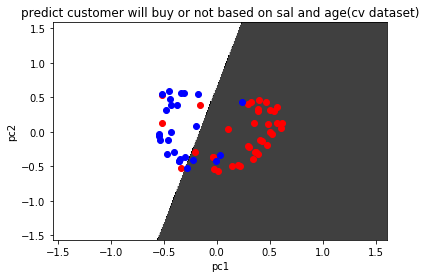

In [17]:
#  visualization on cv set
x,y=x_cv,y_cv
x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('black','white')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y)):
    plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','blue'))(i),label=j)

plt.title('predict customer will buy or not based on sal and age(cv dataset)')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()


In [18]:
# Visualising the classification report
from sklearn.metrics import classification_report
print("\n",classification_report(y_cv, y_cv_pred))


               precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.84      0.81      0.82        26

    accuracy                           0.86        64
   macro avg       0.86      0.85      0.85        64
weighted avg       0.86      0.86      0.86        64



In [19]:

# saving model
import pickle
if acc>=80:
    fileObject = open("test.pkl",'wb')
    pickle.dump(classifier,fileObject)   
    pickle.dump(sc,fileObject)
    pickle.dump(kpca,fileObject)
    pickle.dump(x_test,fileObject)
    pickle.dump(y_test,fileObject)
    
    # here we close the fileObject
    fileObject.close()